In [1]:
import tensorflow as tf
import numpy as np
import os

from tensorflow.keras.optimizers import schedules

from models.resnet_ca_cnn import ResNet18, ResNet18CA, ResNet18CA_transfer
from utils.plotting_utils import plot_history
from data import mechanic_components_loader

d:\conda\envs\anns\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
key = 123

np.random.seed(key)
tf.random.set_seed(key)

In [3]:
saves = os.path.join(os.getcwd(), "models_saved")

In [4]:
def get_save_path(model, name = None):
    if name is None:
        name = model.name
    
    return os.path.join(saves, name) + ".weights.h5"

def save_model(model, name = None):
    save_path = get_save_path(model, name)
    model.save_weights(save_path)
    
def load_model(model, name = None):
    save_path = get_save_path(model, name)
    model.load_weights(save_path)

In [5]:
batch_size = 16
mechanical_components_config = mechanic_components_loader.load(batch_size, key) # load dataset

In [6]:
input_shape = mechanical_components_config.input_shape
width, height, dim = input_shape

num_classes = mechanical_components_config.num_classes
num_features = 512
epochs = 25

In [7]:
train_ds, val_ds, test_ds = mechanical_components_config.datasets

steps_per_epoch = mechanical_components_config.steps_per_epoch
validation_steps = mechanical_components_config.validation_steps

In [8]:
lr_schedule = schedules.ExponentialDecay(
    1e-3,
    decay_steps=12,
    decay_rate=0.85,
    staircase=False
)

def build_optimizer():
    optimizer = tf.keras.optimizers.Adam(lr_schedule)
    return optimizer

In [9]:
METRICS = [
    "accuracy",
]

Epoch 1/25


d:\conda\envs\anns\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.3770 - loss: 1.7412 - val_accuracy: 0.2444 - val_loss: 1.1094
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.3169 - loss: 1.1048 - val_accuracy: 0.2444 - val_loss: 1.0973
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - accuracy: 0.3216 - loss: 1.0941 - val_accuracy: 0.4000 - val_loss: 1.0812
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 350ms/step - accuracy: 0.3653 - loss: 1.0830 - val_accuracy: 0.5111 - val_loss: 1.0634
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.3970 - loss: 1.0607 - val_accuracy: 0.4000 - val_loss: 1.0857
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.5069 - loss: 1.0413 - val_accuracy: 0.6000 - val_loss: 0.9193
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - accuracy: 0.5423 - loss: 0.9232 - val_accuracy: 0.6000 - val_loss: 0.6467
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.5735 - loss: 0.8164 - val_accuracy: 0.6000 - val

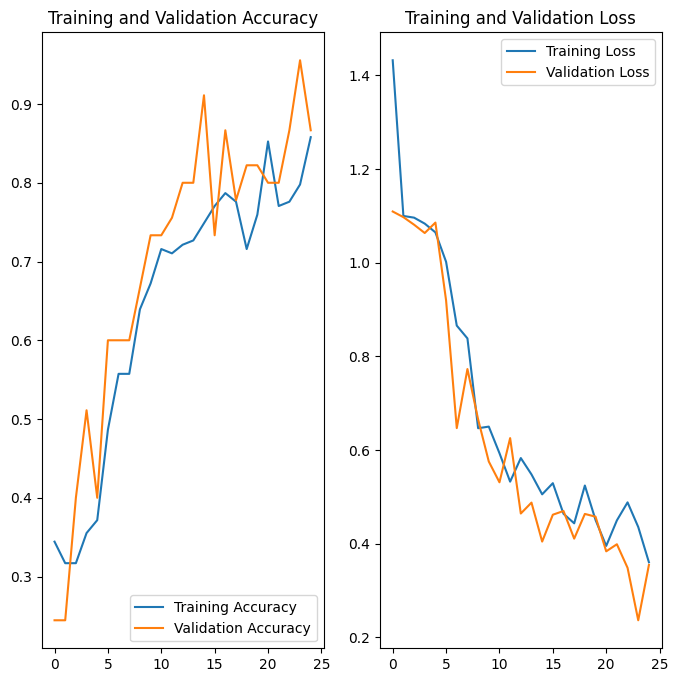

Evaluation of: defect_resnet18_flatten_classic
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6560 - loss: 0.6248
test loss, test acc: [0.6893134713172913, 0.6140350699424744]


In [10]:
agg = "flatten"
fc = "classic"

model_name = f"defect_resnet18_{agg}_{fc}"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(saves, model_name) + ".weights.h5", 
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)
callbacks = [checkpoint]

model_resnet_18 = ResNet18(num_classes, num_features, input_shape, dropout=0.3, aggregation=agg, classifier=fc)
optimizer = build_optimizer()

model_resnet_18.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=METRICS
)

history = model_resnet_18.fit(
    train_ds,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)
plot_history(history)

print(f"Evaluation of: {model_name}")
load_model(model_resnet_18, model_name)
results = model_resnet_18.evaluate(test_ds)
print("test loss, test acc:", results)

In [11]:
numerator_denominator_pairs = {"max": ("max", "sum"), "min": ("min", "sum"), "lehmer": (0., 0.)}

d:\conda\envs\anns\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 738ms/step - accuracy: 0.3488 - loss: 1.3233 - val_accuracy: 0.4000 - val_loss: 1.0915
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 463ms/step - accuracy: 0.3013 - loss: 1.1012 - val_accuracy: 0.4000 - val_loss: 1.0900
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.3288 - loss: 1.0962 - val_accuracy: 0.4000 - val_loss: 1.0851
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - accuracy: 0.3307 - loss: 1.0844 - val_accuracy: 0.4667 - val_loss: 1.0586
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.3584 - loss: 1.0522 - val_accuracy: 0.6222 - val_loss: 0.9609
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 488ms/step - accuracy: 0.6006 - loss: 0.8824 - val_accuracy: 0.4222 - val_loss: 0.8123
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 511ms/step - accuracy: 0.5506 - loss: 0.7787 - val_accuracy: 0.6000 - val_loss: 0.6785
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step - accuracy: 0.5778 - loss: 0.6924 - val_accuracy: 

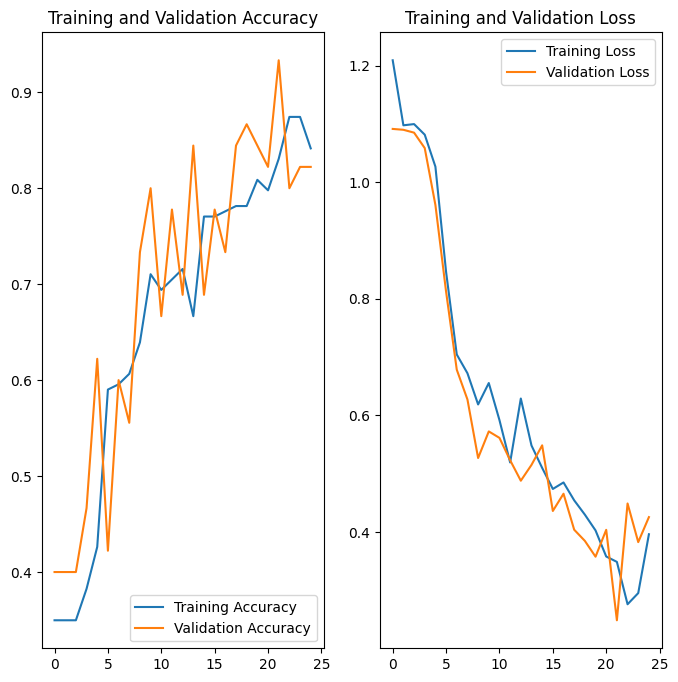

Evaluation of: defect_resnet18_ca_flatten_max_mulcat_classic
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.6583 - loss: 0.6056
test loss, test acc: [0.599534809589386, 0.6666666865348816]


In [12]:
agg = "flatten"
num_den = "max"
cau = "mulcat"
fc = "classic"

model_name = f"defect_resnet18_ca_{agg}_{num_den}_{cau}_{fc}"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(saves, model_name) + ".weights.h5", 
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

callbacks = callbacks = [
    checkpoint
]

numerator, denominator = numerator_denominator_pairs[num_den]
model_resnet_18_ca = ResNet18CA(num_classes, num_features, input_shape, dropout=0.3, aggregation=agg, classifier=fc, 
                                numerator=numerator, denominator=denominator, 
                                causal_aggregator=cau, mulcat_direction="cause")

optimizer = build_optimizer()

model_resnet_18_ca.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=METRICS
)

history = model_resnet_18_ca.fit(
    train_ds,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)
plot_history(history)

print(f"Evaluation of: {model_name}")
load_model(model_resnet_18_ca, model_name)
results = model_resnet_18_ca.evaluate(test_ds)
print("test loss, test acc:", results)

Epoch 1/20


d:\conda\envs\anns\lib\site-packages\keras\src\optimizers\base_optimizer.py:664: UserWarning: Gradients do not exist for variables ['kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.5759 - loss: 0.8269 - val_accuracy: 0.7556 - val_loss: 0.5432
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.7895 - loss: 0.4719 - val_accuracy: 0.8222 - val_loss: 0.4683
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.7612 - loss: 0.5149 - val_accuracy: 0.8444 - val_loss: 0.3704
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.8495 - loss: 0.3695 - val_accuracy: 0.8667 - val_loss: 0.3610
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.8170 - loss: 0.3995 - val_accuracy: 0.8222 - val_loss: 0.3956
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.7857 - loss: 0.4390 - val_accuracy: 0.8000 - val_loss: 0.4475
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.7964 - loss: 0.4591 - val_accuracy: 0.8222 - val_loss: 0.4766
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.8912 - loss: 0.3383 - val_accuracy: 0.8222 - val

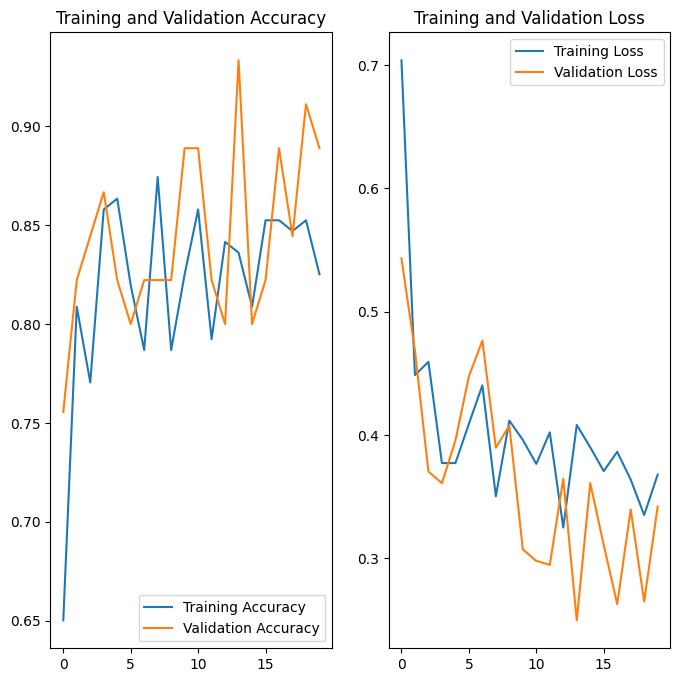

Evaluation of: defect_resnet18_transfer_ca_flatten_max_mulcat_classic
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.6026 - loss: 0.8037
test loss, test acc: [0.7524152398109436, 0.6315789222717285]


In [13]:
agg = "flatten"
num_den = "max"
cau = "mulcat"
fc = "classic"

model_resnet_18 = ResNet18(num_classes, num_features, input_shape, dropout=0.3, aggregation=agg, classifier=fc)
load_model(model_resnet_18, f"defect_resnet18_{agg}_{fc}")

# Extract the resnet from model
resnet_blocks = model_resnet_18.layers[1] # None

model_name = f"defect_resnet18_transfer_ca_{agg}_{num_den}_{cau}_{fc}"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(saves, model_name) + ".weights.h5", 
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)
callbacks = [
    checkpoint
]

numerator, denominator = numerator_denominator_pairs[num_den]
model_resnet_18_ca_transfer = ResNet18CA_transfer(resnet_blocks, num_classes, num_features, input_shape, numerator=numerator, denominator=denominator, 
                                causal_aggregator=cau, aggregation=agg, classifier=fc, mulcat_direction="cause")

lr_schedule = schedules.ExponentialDecay(
    1e-3,
    decay_steps=12,
    decay_rate=0.85,
    staircase=False
)

optimizer = tf.keras.optimizers.Adam(lr_schedule)
model_resnet_18_ca_transfer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=METRICS
)

history = model_resnet_18_ca_transfer.fit(
    train_ds,
    batch_size=batch_size,
    epochs=20,
    callbacks=callbacks,
    validation_data=val_ds,
)
plot_history(history)

print(f"Evaluation of: {model_name}")
load_model(model_resnet_18_ca_transfer, model_name)
results = model_resnet_18_ca_transfer.evaluate(test_ds)
print("test loss, test acc:", results)